<a href="https://colab.research.google.com/github/ZenellesTECH/CodSoft/blob/main/sales_prediction_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 4: Sale Prediction Using Prediction
Programmer: Jayeola Ayomide M.
Domain: Data Science

Aim: To forcast the amount of a product that custormer will purchase and taking into account factors such as Advertising expenditure, target audience segimetation and advertizing plot from selection.

Importing the essential Libraries.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Importing the Dataset.


In [2]:
data=pd.read_csv("/content/advertising.csv.xls")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df=data.copy()
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


(200, 4)

#check the duplicates.

In [7]:
df[df.duplicated()]

,TV,Radio,Newspaper,Sales


#detect missing values.

In [8]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#filling missing values

In [10]:
df.fillna(df.mean()),df.median()

(        TV  Radio  Newspaper  Sales
 0    230.1   37.8       69.2   22.1
 1     44.5   39.3       45.1   10.4
 2     17.2   45.9       69.3   12.0
 3    151.5   41.3       58.5   16.5
 4    180.8   10.8       58.4   17.9
 ..     ...    ...        ...    ...
 195   38.2    3.7       13.8    7.6
 196   94.2    4.9        8.1   14.0
 197  177.0    9.3        6.4   14.8
 198  283.6   42.0       66.2   25.5
 199  232.1    8.6        8.7   18.4
 
 [200 rows x 4 columns],
 TV           149.75
 Radio         22.90
 Newspaper     25.75
 Sales         16.00
 dtype: float64)

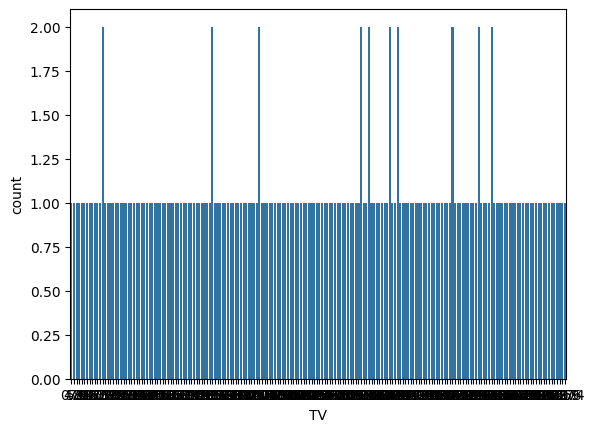

In [13]:
df.TV.value_counts()
sns.countplot(x='TV',data=df)
plt.show()

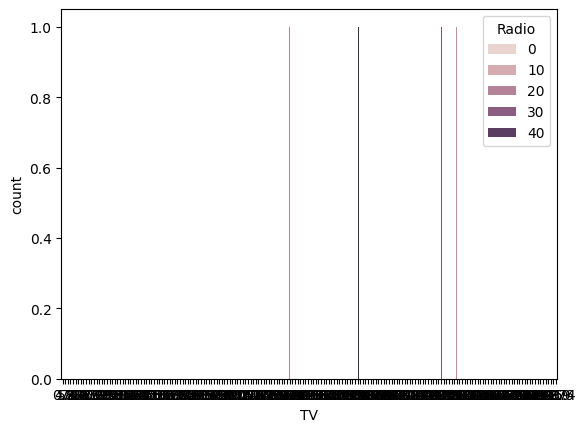

In [16]:
df.Radio.value_counts()
sns.countplot(x='TV',data=df,hue='Radio')
plt.show()

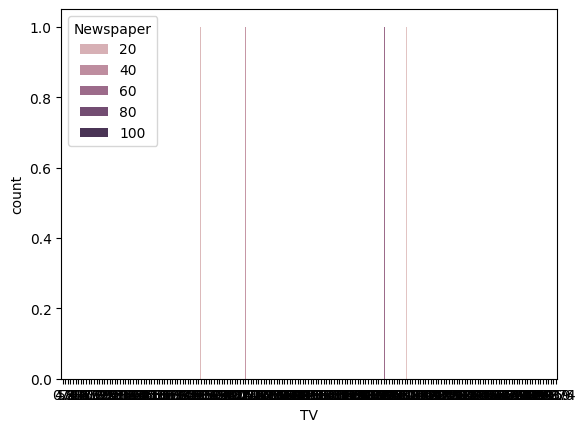

In [18]:
df.Newspaper.value_counts()
sns.countplot(x='TV',hue='Newspaper',data=df)
plt.show()

#Plotting the histogram.

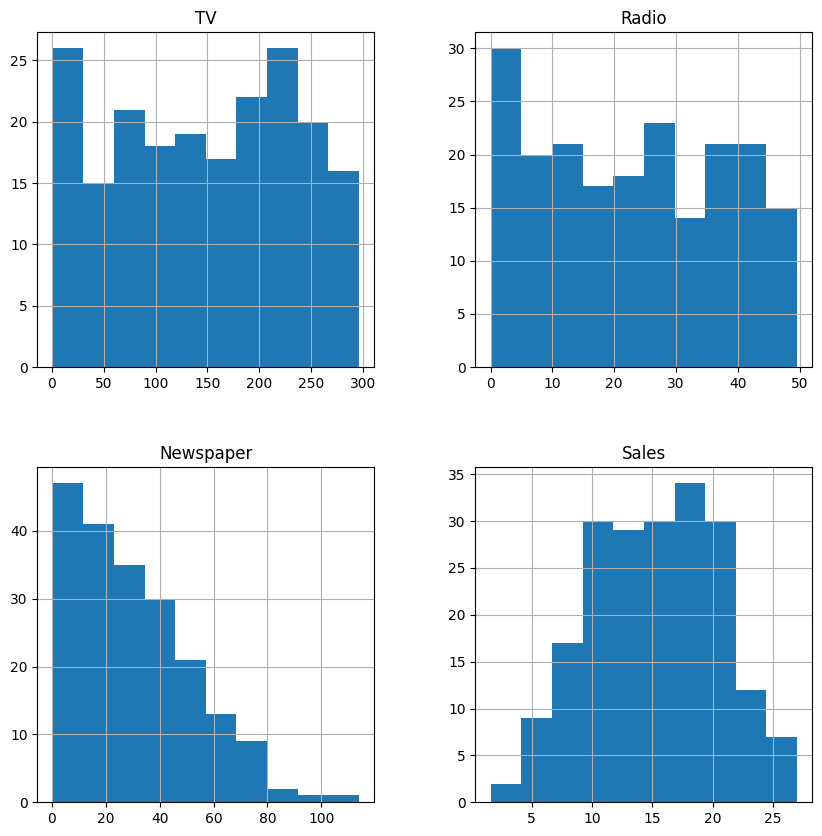

In [23]:
df.hist(figsize=(10,10))

plt.show()

#plotting the histogram for TV.

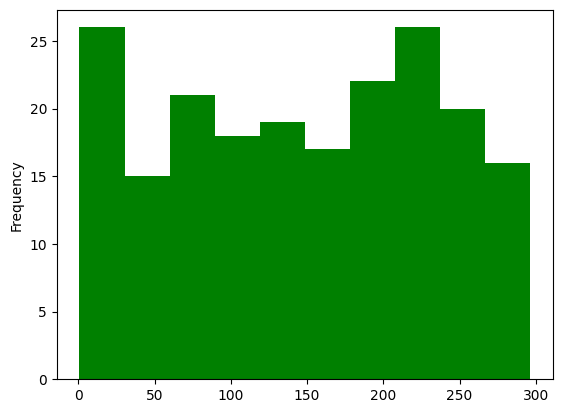

In [24]:
df['TV'].plot.hist(bins=10,color='green',label='TV')
plt.show()

#ploting the histogram fot Radio.

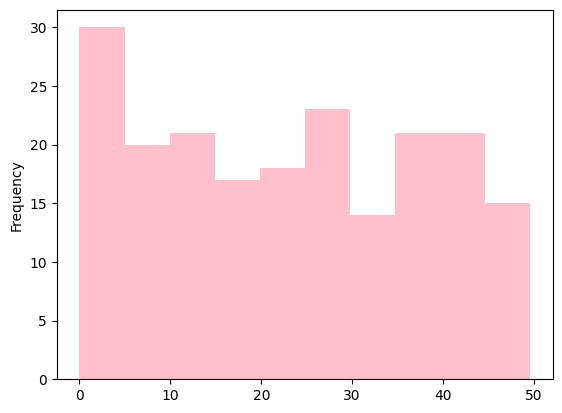

In [27]:
df['Radio'].plot.hist(bins=10,color='pink',label='Radio')
plt.show()

#plotting the histogram for Newspaper.

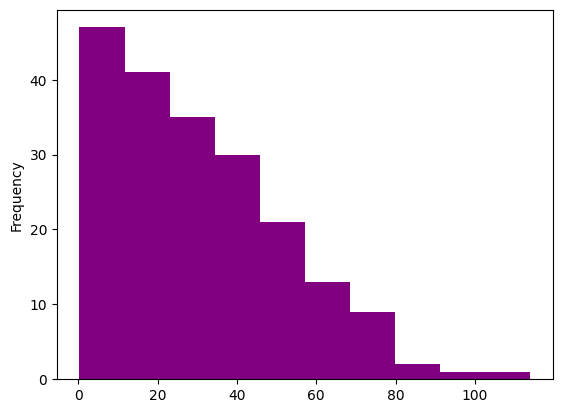

In [28]:
df['Newspaper'].plot.hist(bins=10,color='purple',label='Newspaper')
plt.show()

#plotting the heatmap, correlation map.

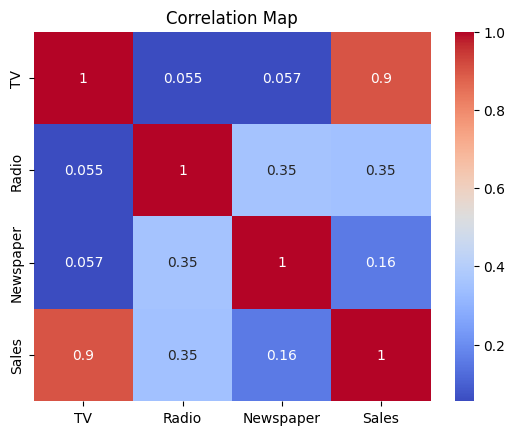

In [29]:
plt.title('Correlation Map')
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

#distribution of the variables.

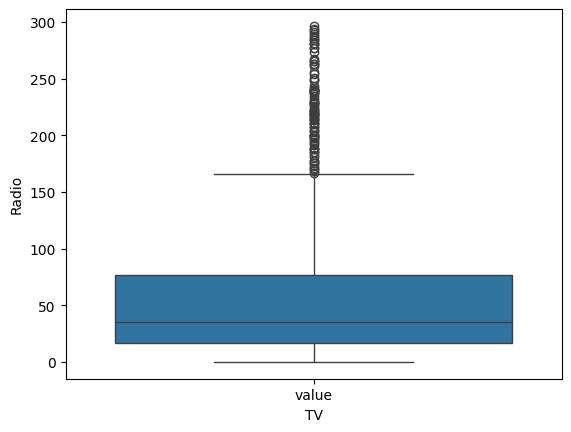

In [30]:
sns.boxplot(df.melt(value_vars=['TV','Radio','Newspaper']))
x='TV'
y='Radio'
z='Newspaper'
plt.xlabel(x)
plt.ylabel(y)
plt.show()

In [31]:
x=df.drop('Sales',axis=1)
y=df['Sales']


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [33]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(x_train,y_train)
Lr.score(x_train,y_train)
res=Lr.predict(x_test)
res

array([10.70988945,  8.68629773,  9.5778695 , 24.86207988, 14.65584473,
        8.3214275 , 10.43048002, 18.4453765 ,  9.73394291, 17.9290798 ,
       23.369886  , 10.67916356, 13.44032325, 17.17416235, 11.77380187,
       13.37072678, 21.26009906,  9.19666875, 14.13201846, 18.9260716 ,
       24.75507991, 12.48481182, 16.57130583, 13.77344772,  7.79299106,
       15.19648316, 14.71607944, 20.73862119, 17.01041859,  8.83474391,
       12.09424377, 20.74886454, 21.26147987, 21.90420095,  7.08087067,
        7.04431681,  9.15949871, 15.47796148, 13.28282334,  7.23769883])

In [40]:
Lr.coef_


array([ 0.05368006,  0.11152624, -0.00351166])

In [36]:
Lr.intercept_

4.773205203269841

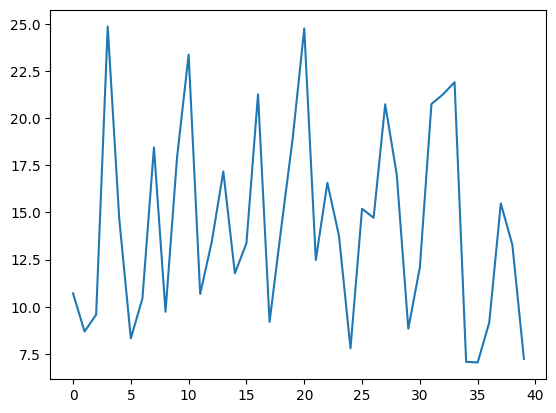

In [37]:
Lr.coef_ + Lr.intercept_
plt.plot(res)